In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="whitegrid")

In [4]:
data = pd.concat([X, y], axis=1)

In [5]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
data.shape

(581012, 55)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [8]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [9]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


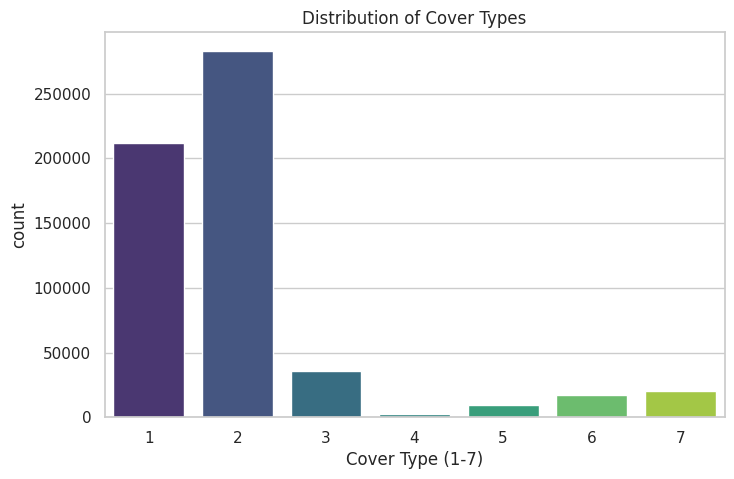

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cover_Type', data=data, palette='viridis')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type (1-7)')
plt.show()

In [11]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type'] - 1

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [15]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest Accuracy: 0.9542266550777518
              precision    recall  f1-score   support

           0     0.9647    0.9419    0.9532     42368
           1     0.9488    0.9737    0.9611     56661
           2     0.9407    0.9610    0.9507      7151
           3     0.9190    0.8470    0.8815       549
           4     0.9509    0.7757    0.8544      1899
           5     0.9326    0.8961    0.9140      3473
           6     0.9742    0.9471    0.9604      4102

    accuracy                         0.9542    116203
   macro avg     0.9473    0.9061    0.9250    116203
weighted avg     0.9544    0.9542    0.9540    116203



In [16]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss')

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [17]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))

XGBoost Accuracy: 0.9648890304036901
              precision    recall  f1-score   support

           0     0.9688    0.9578    0.9632     42368
           1     0.9642    0.9756    0.9699     56661
           2     0.9606    0.9680    0.9643      7151
           3     0.9112    0.8597    0.8847       549
           4     0.9454    0.8752    0.9089      1899
           5     0.9443    0.9332    0.9387      3473
           6     0.9747    0.9678    0.9713      4102

    accuracy                         0.9649    116203
   macro avg     0.9527    0.9339    0.9430    116203
weighted avg     0.9649    0.9649    0.9648    116203



In [18]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth'   : [8, 12],
    'learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(
    XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss'),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1)

grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 500}
Best CV score: 0.9650480081290235


In [19]:
models = {
    'Random Forest': y_pred_rf,
    'XGBoost'     : y_pred_xgb
}

acc = {name: accuracy_score(y_test, pred) for name, pred in models.items()}
print("Accuracy comparison:")
for n, a in acc.items():
    print(f"  {n}: {a:.4f}")

Accuracy comparison:
  Random Forest: 0.9542
  XGBoost: 0.9649


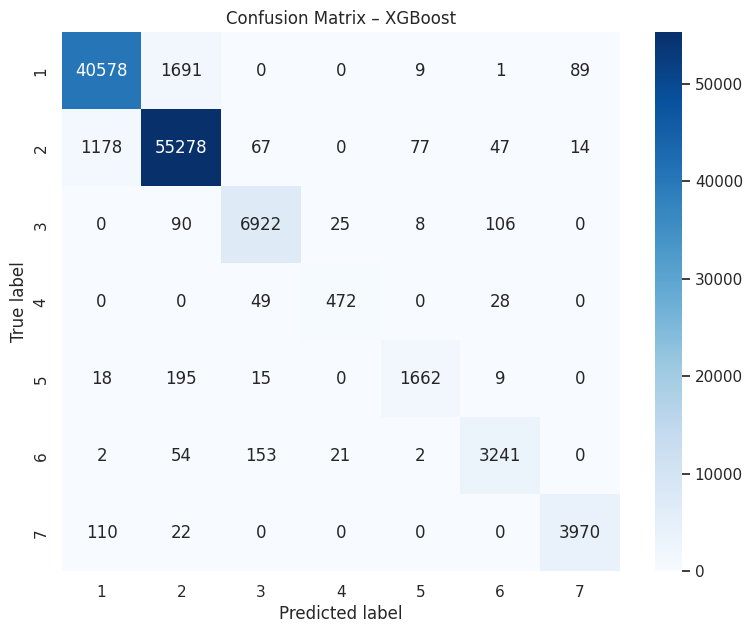

In [20]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('Confusion Matrix – XGBoost')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

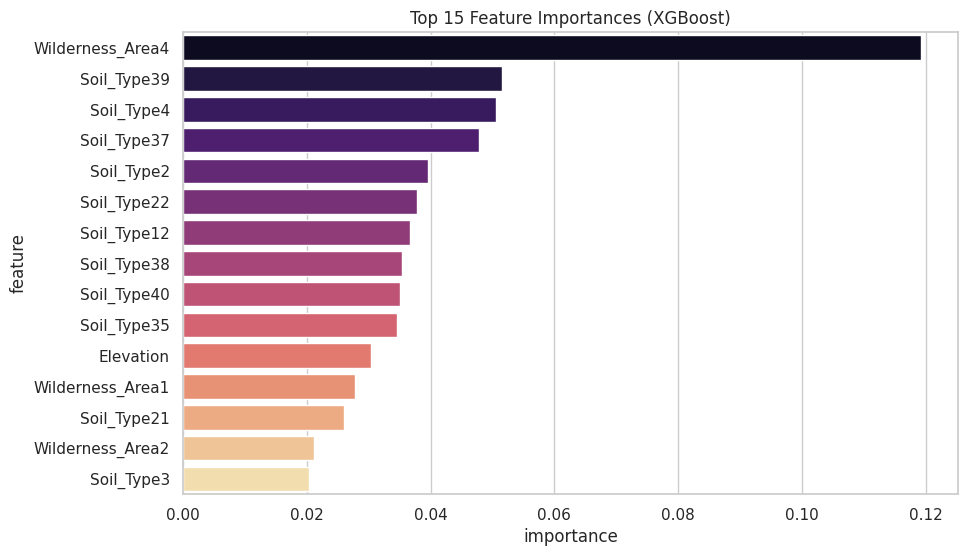

In [23]:
importances = xgb.feature_importances_
feat_names = X.columns

imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=imp_df, palette='magma')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()

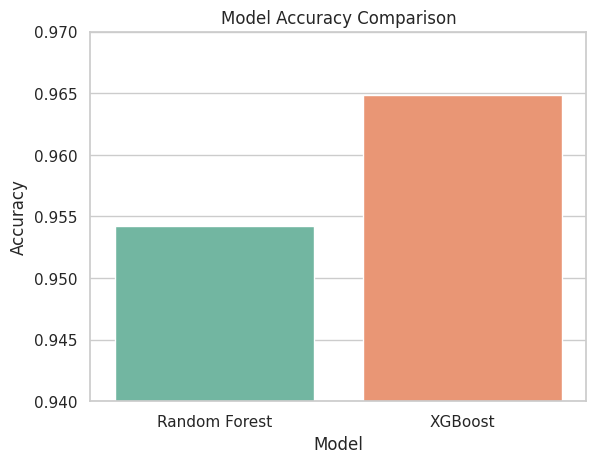

In [24]:
acc_df = pd.DataFrame(list(acc.items()), columns=['Model','Accuracy'])
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='Set2')
plt.ylim(0.94, 0.97)
plt.title('Model Accuracy Comparison')
plt.show()